In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.4
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate04'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)

C:\Users\foxku\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.84it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.17it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.58it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.58it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.43it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.70it/s]


Validation result: best alpha 0.1, best score 0.7506634064705773, scores {0.0: 4.735846182057571, 0.01: 3.6514014862079325, 0.1: 0.7506634064705773, 1.0: 0.8124506333940987, 10.0: 0.9444186404202445, 100.0: 0.9920863695851851}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.96it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.90it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.44it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.29it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.22it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.36it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.84it/s]


Validation result: best alpha 0.1, best score 0.7506634064705773, scores {0.0: 4.735846182057571, 0.01: 3.6514014862079325, 0.1: 0.7506634064705773, 1.0: 0.8124506333940987, 10.0: 0.9444186404202445, 100.0: 0.9920863695851851}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 126.24it/s]


loss 0.2079506749338772
loss 0.07350785689381222
loss 0.05458498467907535
loss 0.05306456470564304
loss 0.05056671053133067
loss 0.05250831366243567
loss 0.053047583377043774
loss 0.05001022639356021
loss 0.048555924116250454
loss 0.04897276972359221
number of runs used by missForest: 10
loss: 0.04897276972359221
loss 0.20279011300940403
loss 0.07776620855580473
loss 0.05739747583148256
loss 0.05112402059938477
loss 0.05124581980011864
loss 0.05478918609750653
loss 0.0582504219627149
loss 0.059476033744999546
loss 0.06072956099855028
loss 0.0644811296235672
number of runs used by missForest: 10
loss: 0.0644811296235672


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 399.09it/s]


iteration: 1


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.63it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.75it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.80it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.40it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.37it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.25it/s]


Validation result: best alpha 0.1, best score 0.7403861174767672, scores {0.0: 0.7563488520544418, 0.01: 0.7417706339501847, 0.1: 0.7403861174767672, 1.0: 0.7920106970298579, 10.0: 0.9128903955914848, 100.0: 0.9610919726082333}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.23it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.48it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.12it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.81it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.48it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.03it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.66it/s]


Validation result: best alpha 0.1, best score 0.7403861174767673, scores {0.0: 0.7563488520544418, 0.01: 0.7417706339501847, 0.1: 0.7403861174767673, 1.0: 0.7920106970298579, 10.0: 0.9128903955914848, 100.0: 0.9610919726082333}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 80.34it/s]


loss 0.1952325949280942
loss 0.06285448424647595
loss 0.04792455547073292
loss 0.04864954139655646
loss 0.05093951177989511
loss 0.05353691546338239
loss 0.05478216232560391
loss 0.05297756631410988
loss 0.048117318302326496
loss 0.045943170578260556
number of runs used by missForest: 10
loss: 0.045943170578260556
loss 0.19932598426967352
loss 0.06387508310152151
loss 0.055996622862928044
loss 0.05642930117987272
loss 0.05804583070908127
loss 0.05789764090922785
loss 0.06015161922322901
loss 0.05925219890299926
loss 0.0603683338463164
loss 0.0638968286182088
number of runs used by missForest: 10
loss: 0.0638968286182088


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 442.51it/s]


iteration: 2


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.04it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.25it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.53it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.93it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.01it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.34it/s]


Validation result: best alpha 0.1, best score 0.8117284113538052, scores {0.0: 3.340402603645859, 0.01: 73.14882785843835, 0.1: 0.8117284113538052, 1.0: 0.8247341513581695, 10.0: 0.9553925177171576, 100.0: 1.0015362743789715}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.71it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.15it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.86it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.63it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.81it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.43it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.76it/s]


Validation result: best alpha 0.1, best score 0.8117284113538052, scores {0.0: 3.340402603645859, 0.01: 73.14882785843835, 0.1: 0.8117284113538052, 1.0: 0.8247341513581696, 10.0: 0.9553925177171575, 100.0: 1.0015362743789715}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 203.14it/s]


loss 0.2150493747579505
loss 0.08893300602209214
loss 0.07335112250742172
loss 0.07092517572894089
loss 0.06616836764805216
loss 0.06886166094786154
loss 0.06987514705666371
loss 0.06757210535599273
loss 0.0660710253509997
loss 0.06985157095269869
number of runs used by missForest: 10
loss: 0.06985157095269869
loss 0.2153440365015261
loss 0.08287700156960626
loss 0.06631185638628458
loss 0.06582439445494856
loss 0.06063788855184825
loss 0.06344261584115625
loss 0.06557022978977153
loss 0.0729851406503035
loss 0.07638178636707524
loss 0.0781281431436684
number of runs used by missForest: 10
loss: 0.0781281431436684


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 422.59it/s]


iteration: 3


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.83it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.18it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.29it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.24it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.18it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.18it/s]


Validation result: best alpha 1.0, best score 0.8207850117602982, scores {0.0: 4.775749831559327, 0.01: 59.407564669465614, 0.1: 1.302817055916676, 1.0: 0.8207850117602982, 10.0: 0.9507893176014085, 100.0: 1.0014716913338555}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.58it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.41it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.13it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.41it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.13it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.66it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.55it/s]


Validation result: best alpha 1.0, best score 0.8207850117602982, scores {0.0: 4.775749831559327, 0.01: 59.40756466946561, 0.1: 1.302817055916676, 1.0: 0.8207850117602982, 10.0: 0.9507893176014085, 100.0: 1.0014716913338557}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.58it/s]


loss 0.22210446637182032
loss 0.0770062224284894
loss 0.06657168625639218
loss 0.06167495363342224
loss 0.06669124521297101
loss 0.07187770055181925
loss 0.07125010705686081
loss 0.07212647404215335
loss 0.07509220793324713
loss 0.07846286389646628
number of runs used by missForest: 10
loss: 0.07846286389646628
loss 0.2140050991359934
loss 0.06763163565697282
loss 0.06347994467727906
loss 0.06516290839563624
loss 0.0752682008938457
loss 0.08078240902196353
loss 0.08193210135105859
loss 0.0846846993858071
loss 0.0897371220224049
loss 0.09228518596580951
number of runs used by missForest: 10
loss: 0.09228518596580951


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 361.20it/s]


iteration: 4


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.78it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.72it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.85it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.16it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.76it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.36it/s]


Validation result: best alpha 0.1, best score 0.7313819468585938, scores {0.0: 0.8671630687755946, 0.01: 0.7494628128176138, 0.1: 0.7313819468585938, 1.0: 0.7960717019645541, 10.0: 0.9353501394024586, 100.0: 0.9872797346890199}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.05it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.97it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.65it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.02it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.69it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.96it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.47it/s]


Validation result: best alpha 0.1, best score 0.7313819468585938, scores {0.0: 0.8671630687755946, 0.01: 0.7494628128176138, 0.1: 0.7313819468585938, 1.0: 0.7960717019645542, 10.0: 0.9353501394024586, 100.0: 0.98727973468902}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 211.77it/s]


loss 0.19292808636222616
loss 0.06281613073307163
loss 0.04437626151476712
loss 0.04054117938354712
loss 0.04141596940254624
loss 0.04184092518481593
loss 0.04219865591816068
loss 0.04390513877273791
loss 0.045010128973515216
loss 0.04749812585035286
number of runs used by missForest: 10
loss: 0.04749812585035286
loss 0.1960639599425179
loss 0.06387890799153505
loss 0.0485827636303353
loss 0.04253669795556906
loss 0.04083802986032831
loss 0.04160975263148916
loss 0.04130730645870916
loss 0.042683742057924905
loss 0.044256218291949014
loss 0.04771012530448041
number of runs used by missForest: 10
loss: 0.04771012530448041


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 318.41it/s]


iteration: 5


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.20it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.13it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.16it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.00it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.67it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.32it/s]


Validation result: best alpha 0.1, best score 0.7686758651070912, scores {0.0: 1.1526516113202097, 0.01: 324.0206154759791, 0.1: 0.7686758651070912, 1.0: 0.8221598990915437, 10.0: 0.9527379220132023, 100.0: 1.0043912484873354}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.57it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.61it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.94it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.83it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.35it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.79it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.19it/s]


Validation result: best alpha 0.1, best score 0.7686758651070912, scores {0.0: 1.1526516113202099, 0.01: 324.0206154759791, 0.1: 0.7686758651070912, 1.0: 0.8221598990915437, 10.0: 0.9527379220132023, 100.0: 1.0043912484873354}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.46it/s]


loss 0.20818959598163256
loss 0.08991116937153396
loss 0.07617297544471438
loss 0.07305332789666528
loss 0.06795010606976853
loss 0.06611862235051305
loss 0.06367150973372102
loss 0.06356905643718544
loss 0.061476960225089056
loss 0.06115506534728562
number of runs used by missForest: 10
loss: 0.06115506534728562
loss 0.2149038047304133
loss 0.08007307212657046
loss 0.06088897773106816
loss 0.05657069272973867
loss 0.05527421993357963
loss 0.05701716637467041
loss 0.05898290693403348
loss 0.05863093273881431
loss 0.05680341254973077
loss 0.05626964893257055
number of runs used by missForest: 10
loss: 0.05626964893257055


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 263.48it/s]


iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.86it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.95it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.46it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.65it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.93it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.00it/s]


Validation result: best alpha 0.01, best score 0.7683527107749064, scores {0.0: 0.7711968485571055, 0.01: 0.7683527107749064, 0.1: 0.7684740882710005, 1.0: 0.8182075168306681, 10.0: 0.9287312460864902, 100.0: 0.9691023445404682}
Value alpha used in for transforming is: 0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.08it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.14it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.88it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.24it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.14it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.25it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.26it/s]


Validation result: best alpha 0.01, best score 0.7683527107749064, scores {0.0: 0.7711968485571055, 0.01: 0.7683527107749064, 0.1: 0.7684740882710004, 1.0: 0.8182075168306681, 10.0: 0.9287312460864902, 100.0: 0.9691023445404682}
Value alpha used in for transforming is: 0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 84.20it/s]


loss 0.2105012534290575
loss 0.09344686307367407
loss 0.0717274838293179
loss 0.0746145699191487
loss 0.07348772783992316
loss 0.07313695706695363
loss 0.07384833769376063
loss 0.0716118591841139
loss 0.07721393862059663
loss 0.07843678029743399
number of runs used by missForest: 10
loss: 0.07843678029743399
loss 0.2250504256623492
loss 0.0835501637920929
loss 0.06967555993147463
loss 0.06664825903108437
loss 0.0666802938521692
loss 0.06589640534105014
loss 0.06204960031115216
loss 0.06209696403196269
loss 0.06334684435389375
loss 0.06264566968771493
number of runs used by missForest: 10
loss: 0.06264566968771493


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 286.39it/s]


iteration: 7


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.25it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.84it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.57it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.55it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.31it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.87it/s]


Validation result: best alpha 0.1, best score 0.7552715671596558, scores {0.0: 0.8458142201597331, 0.01: 44.478836666045126, 0.1: 0.7552715671596558, 1.0: 0.8124101119267632, 10.0: 0.9441548016713656, 100.0: 0.994575796393952}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.92it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.43it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.78it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.38it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.73it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.05it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.87it/s]


Validation result: best alpha 0.1, best score 0.7552715671596557, scores {0.0: 0.8458142201597331, 0.01: 44.478836666045126, 0.1: 0.7552715671596557, 1.0: 0.8124101119267632, 10.0: 0.9441548016713656, 100.0: 0.9945757963939521}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 134.21it/s]


loss 0.19483000582629764
loss 0.059937227098223765
loss 0.04248952874522135
loss 0.0404887550461316
loss 0.03920612040049243
loss 0.03894670534777455
loss 0.039355528876016704
loss 0.041640821606237256
loss 0.04055863077955828
loss 0.04148170164662182
number of runs used by missForest: 10
loss: 0.04148170164662182
loss 0.20556510987508242
loss 0.0695621361205679
loss 0.05151092065385511
loss 0.04539690882701934
loss 0.04216523482780508
loss 0.040120133132279905
loss 0.04007866689025389
loss 0.04061760469519358
loss 0.04181660553954837
loss 0.04413793603577524
number of runs used by missForest: 10
loss: 0.04413793603577524


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 276.29it/s]
C:\Users\foxku\Downloads\Github uploaded codes\shapley missing\SHAP missing revision 1 all experiments\funcs\explain.py:152: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  get_spearmanr = lambda shap_vals_method: np.array([spearmanr(shap_values_ori.values[:,i], shap_vals_method.values[:,i])[0]


iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.80it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.93it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.42it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.16it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.33it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.58it/s]


Validation result: best alpha 0.1, best score 0.768691273165324, scores {0.0: 9.706600451673038, 0.01: 51.485779070545426, 0.1: 0.768691273165324, 1.0: 0.8190089707371527, 10.0: 0.9376609357974071, 100.0: 0.982958255237965}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.49it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.56it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.80it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.46it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.84it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.97it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.31it/s]


Validation result: best alpha 0.1, best score 0.768691273165324, scores {0.0: 9.70660045167304, 0.01: 51.48577907054544, 0.1: 0.768691273165324, 1.0: 0.8190089707371527, 10.0: 0.9376609357974072, 100.0: 0.982958255237965}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.92it/s]


loss 0.21342585824446267
loss 0.0789331834984818
loss 0.06774527058897
loss 0.06323522495377484
loss 0.06253121333333708
loss 0.06453798090750389
loss 0.06554346921280092
loss 0.06554360249534646
loss 0.06657101583835508
loss 0.0669818006794365
number of runs used by missForest: 10
loss: 0.0669818006794365
loss 0.2164384421144652
loss 0.07887919585570213
loss 0.06225593719325385
loss 0.061039884772011006
loss 0.05981870296684074
loss 0.060852655335614174
loss 0.06266289307006628
loss 0.06786837624719858
loss 0.07070778833987096
loss 0.07318075119626405
number of runs used by missForest: 10
loss: 0.07318075119626405


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 313.42it/s]


iteration: 9


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.83it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.24it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.30it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.23it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.58it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.16it/s]


Validation result: best alpha 0.1, best score 0.7398337758557559, scores {0.0: 0.8835111518789812, 0.01: 1.7453843586332514, 0.1: 0.7398337758557559, 1.0: 0.7972805445971373, 10.0: 0.9306638537634984, 100.0: 0.9806824427792277}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.07it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.38it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.64it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.86it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.27it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.28it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.39it/s]


Validation result: best alpha 0.1, best score 0.7398337758557559, scores {0.0: 0.8835111518789812, 0.01: 1.7453843586332516, 0.1: 0.7398337758557559, 1.0: 0.7972805445971373, 10.0: 0.9306638537634984, 100.0: 0.9806824427792276}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 127.15it/s]


loss 0.19623934450240807
loss 0.07346797726847915
loss 0.06709238166087654
loss 0.06727412580213221
loss 0.06804552976357249
loss 0.06877996962056314
loss 0.07092893841754876
loss 0.07177482051053068
loss 0.07309453383193801
loss 0.07570224026763171
number of runs used by missForest: 10
loss: 0.07570224026763171
loss 0.2049421582438107
loss 0.07498878250793914
loss 0.06077444463173034
loss 0.060304165716257255
loss 0.06320611771939322
loss 0.06591878356741758
loss 0.06860948500984687
loss 0.06846782260139878
loss 0.07186700145559777
loss 0.07097770079820132
number of runs used by missForest: 10
loss: 0.07097770079820132


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 284.21it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
s5 & 0.094 & 0.145 & 0.071 & 0.086 & 0.090 & 0.090 & 0.091 & 0.070 \\
bmi & 0.093 & 0.459 & 0.075 & 0.075 & 0.072 & 0.069 & 0.072 & 0.074 \\
bp & 0.046 & 0.312 & 0.052 & 0.042 & 0.042 & 0.039 & 0.044 & 0.050 \\
s6 & 0.041 & 0.126 & 0.043 & 0.036 & 0.042 & 0.039 & 0.041 & 0.048 \\
s3 & 0.033 & 0.036 & 0.042 & 0.042 & 0.045 & 0.046 & 0.041 & 0.042 \\
sex & 0.028 & 0.040 & 0.025 & 0.034 & 0.034 & 0.029 & 0.032 & 0.020 \\
s2 & 0.028 & 0.162 & 0.032 & 0.024 & 0.036 & 0.034 & 0.039 & 0.034 \\
age & 0.025 & 0.077 & 0.031 & 0.031 & 0.037 & 0.032 & 0.030 & 0.040 \\
s1 & 0.016 & 0.038 & 0.023 & 0.026 & 0.028 & 0.033 & 0.028 & 0.027 \\
s4 & 0.016 & 0.030 & 0.040 & 0.025 & 0.022 & 0.029 & 0.025 & 0.043 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.397 0.345 0.244 0.276 0.26  0.485]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.132 0.029 0.027 0.027 0.029 0.027 0.034]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.292 0.283 0.293 0.272 0.306 0.285 0.337]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.751 0.   ]
 [0.755 0.   ]
 [0.759 0.   ]
 [0.769 0.   ]
 [0.735 0.   ]
 [0.763 0.   ]
 [0.717 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[0.356 0.472 0.334 0.344 0.389 0.359 0.606 0.408 0.585 0.427]
 [0.358 0.594 0.695 0.592 0.072 0.198 0.54  0.294 0.716 0.384]
 [0.268 0.594 0.651 0.5   0.129 0.157 0.598 0.103 0.773 0.366]
 [0.263 0.634 0.716 0.

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.356040
Mean Imputation,0.397301,0.357727
MICE,0.344849,0.267807
DIMV,0.243728,0.262925
missForest,0.276384,0.208190
SOFT-IMPUTE,0.259813,0.348873
GAIN,0.485210,0.257485


imputation MSE versus Spearman statistic


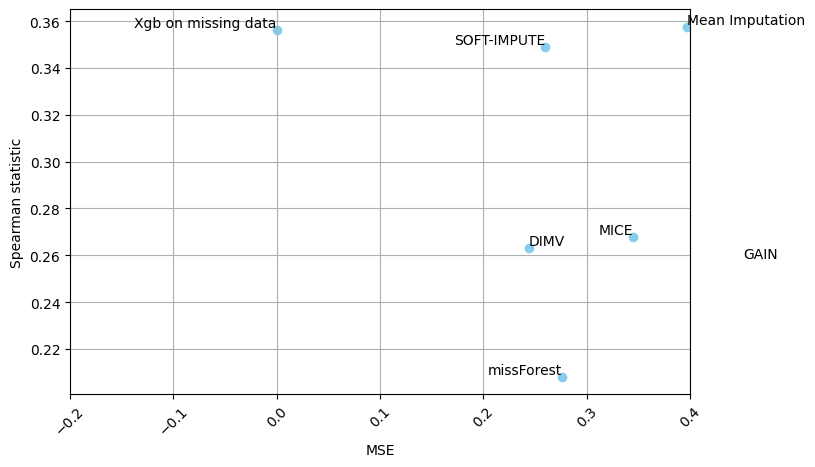

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Mean Imputation') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.2, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.292274,0.131913
Mean Imputation,0.282822,0.028853
MICE,0.292595,0.027137
DIMV,0.271948,0.026641
missForest,0.306468,0.028638
SOFT-IMPUTE,0.284593,0.026956
GAIN,0.336737,0.034484


imputation MSE versus Shapley MSE


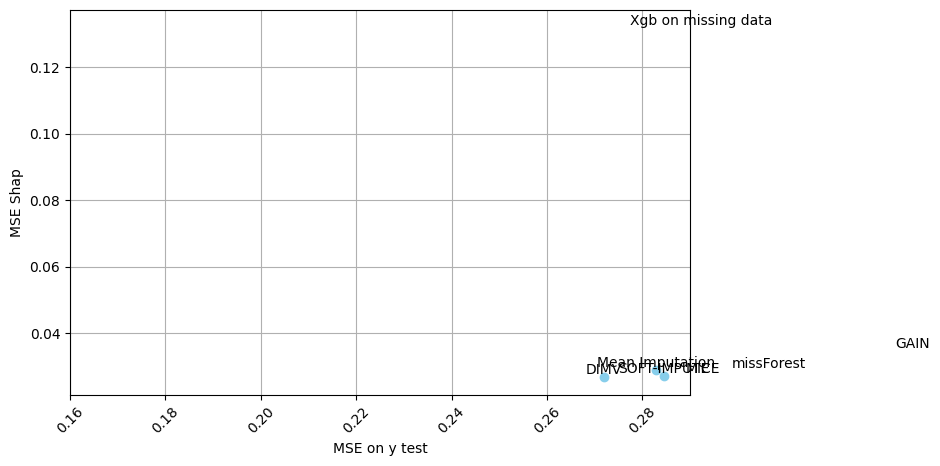

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.16, 0.29)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.131913
Mean Imputation,0.397301,0.028853
MICE,0.344849,0.027137
DIMV,0.243728,0.026641
missForest,0.276384,0.028638
SOFT-IMPUTE,0.259813,0.026956
GAIN,0.485210,0.034484


imputation MSE versus Shapley MSE


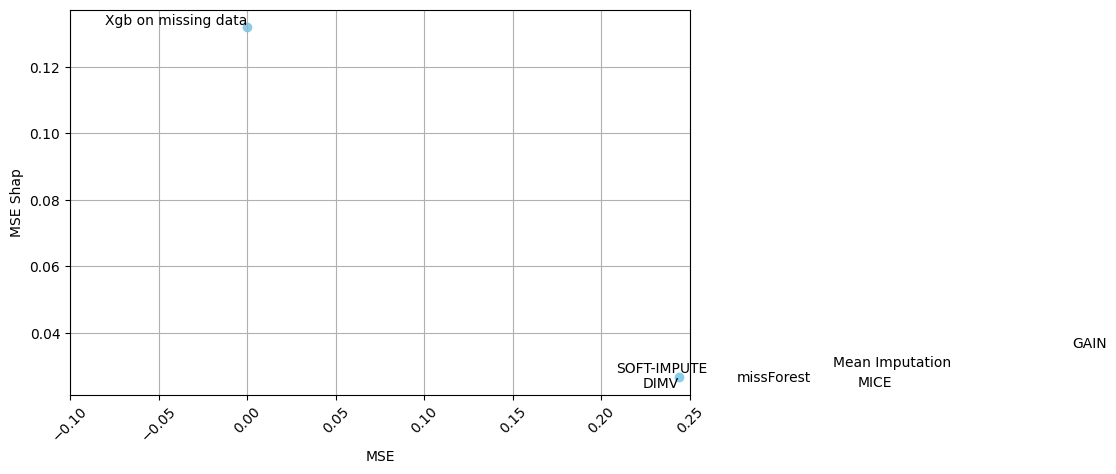

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

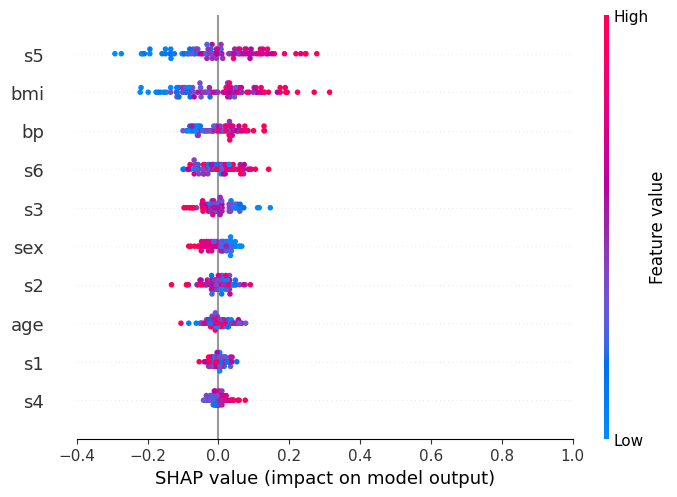

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

C:\Users\foxku\.conda\envs\tf\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


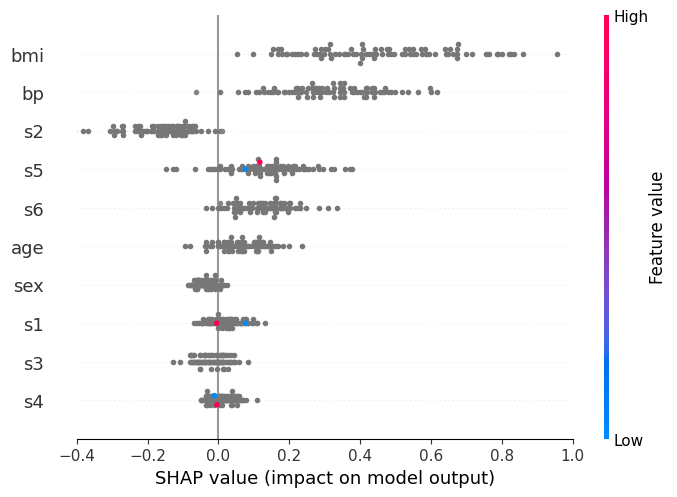

In [22]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

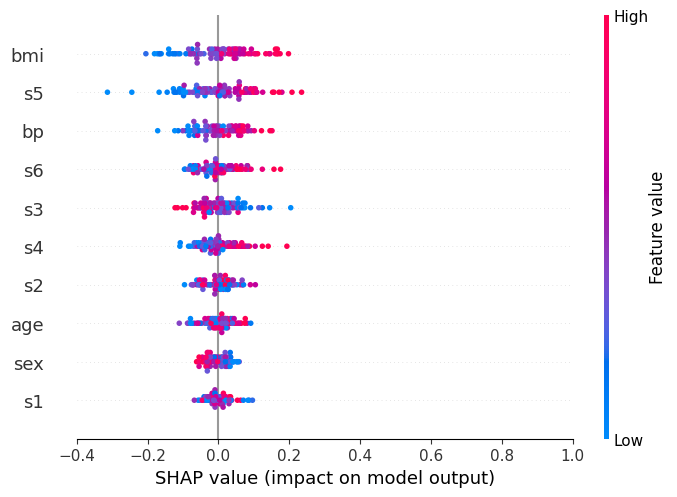

In [24]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

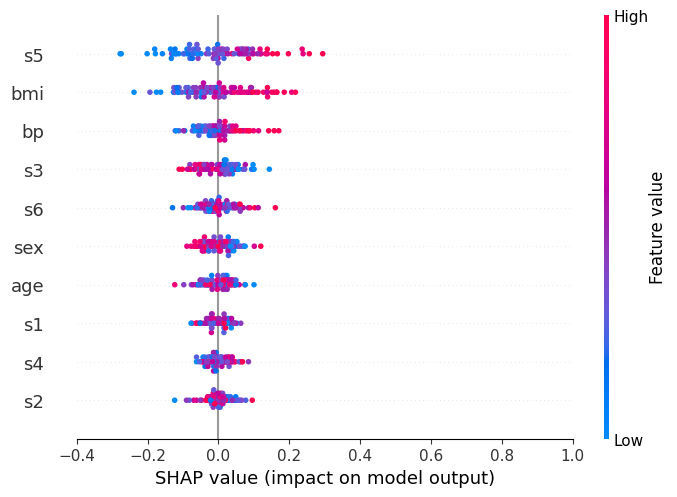

In [28]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

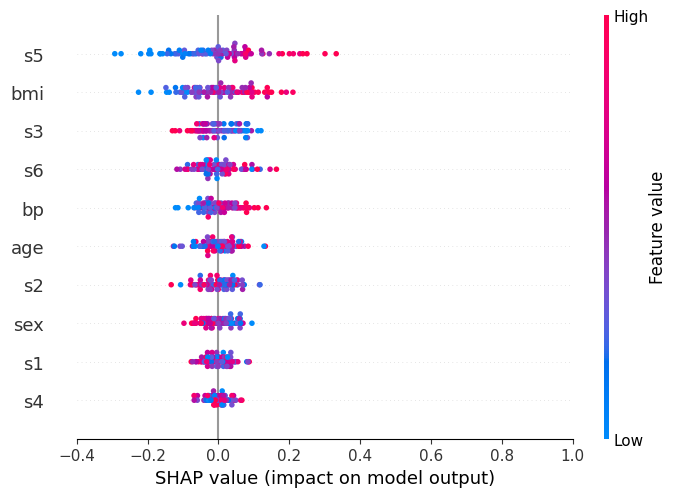

In [30]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

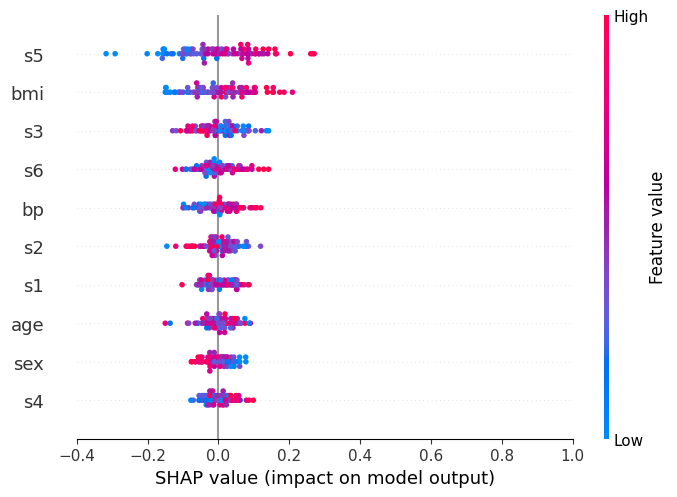

In [32]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

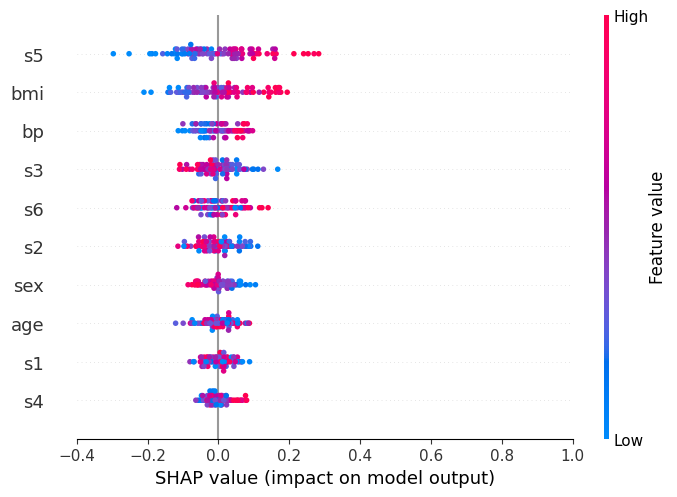

In [34]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

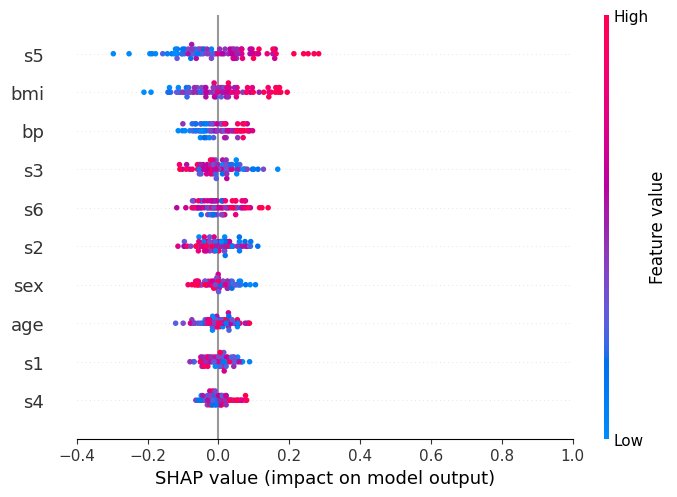

In [36]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.xlim(-0.4, 1.0)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

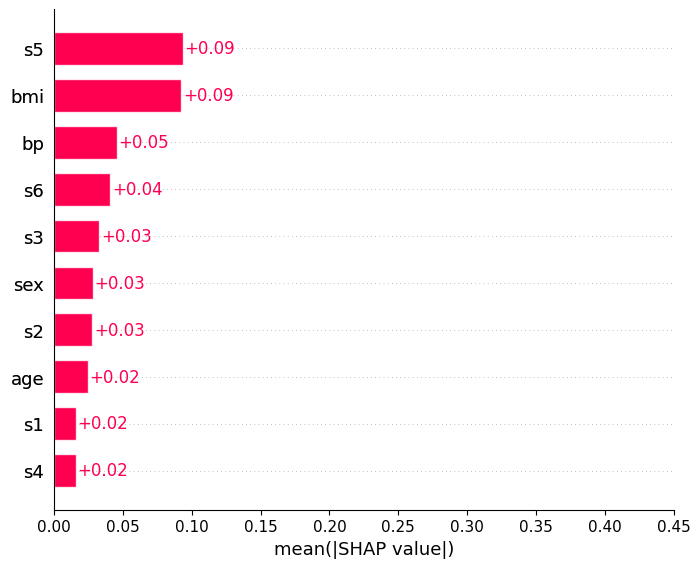

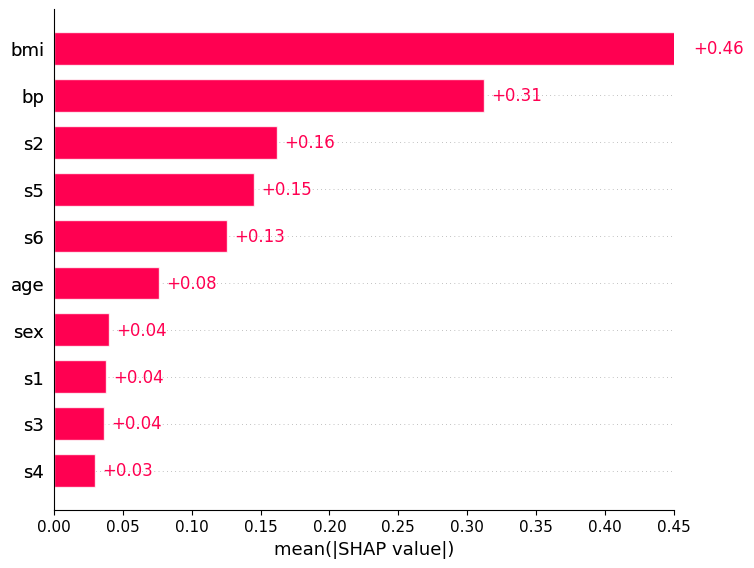

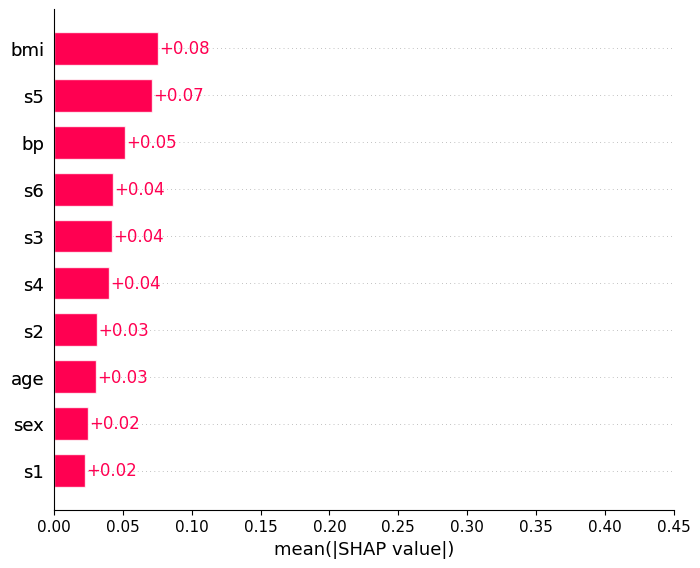

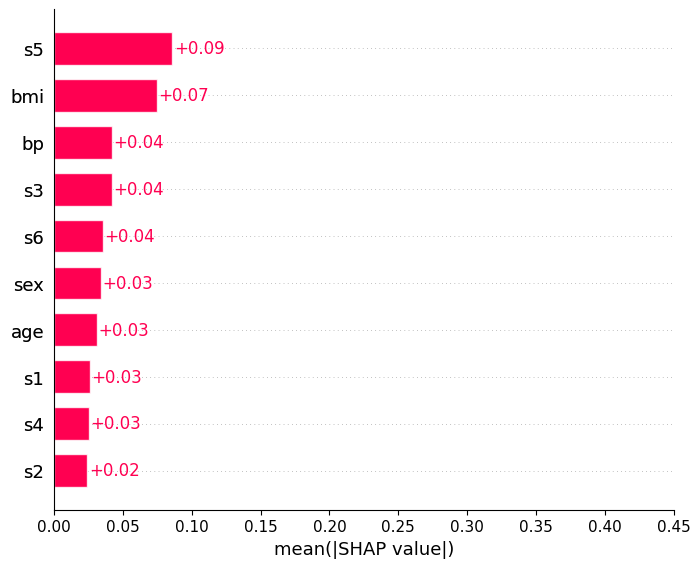

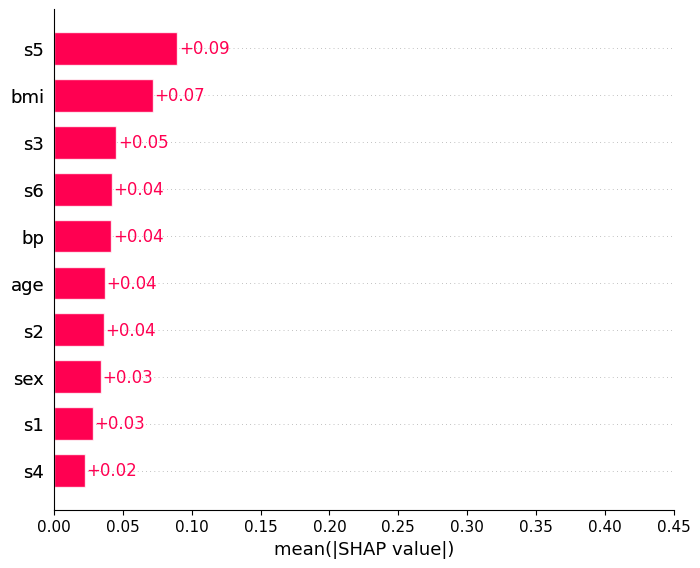

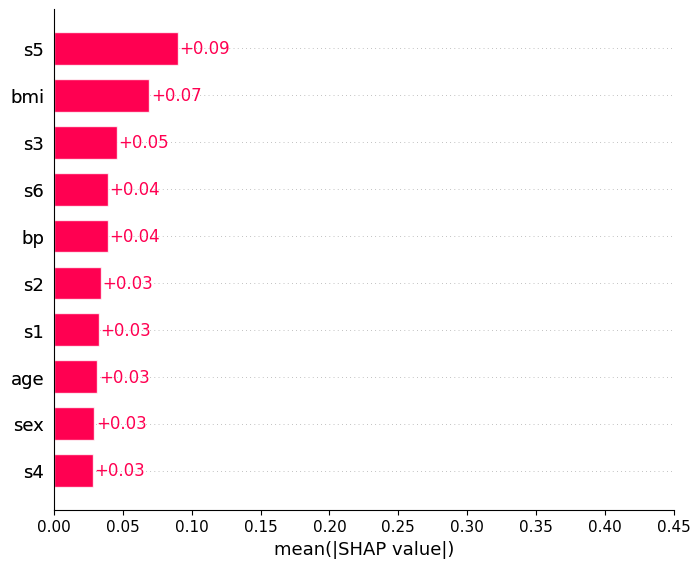

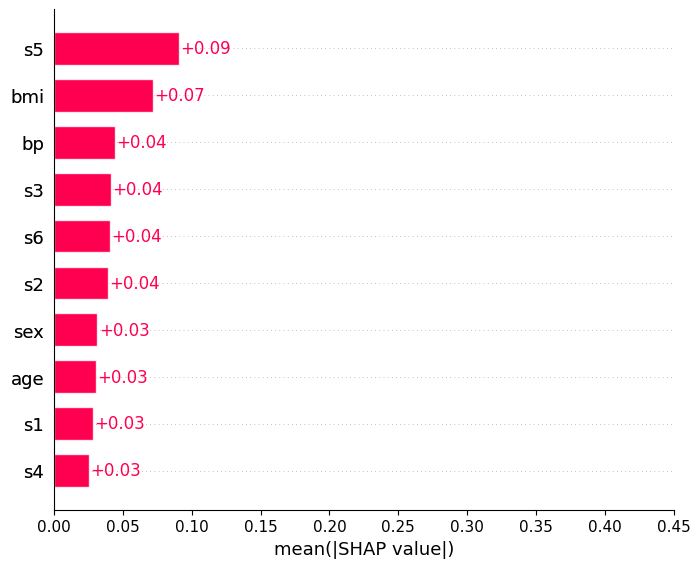

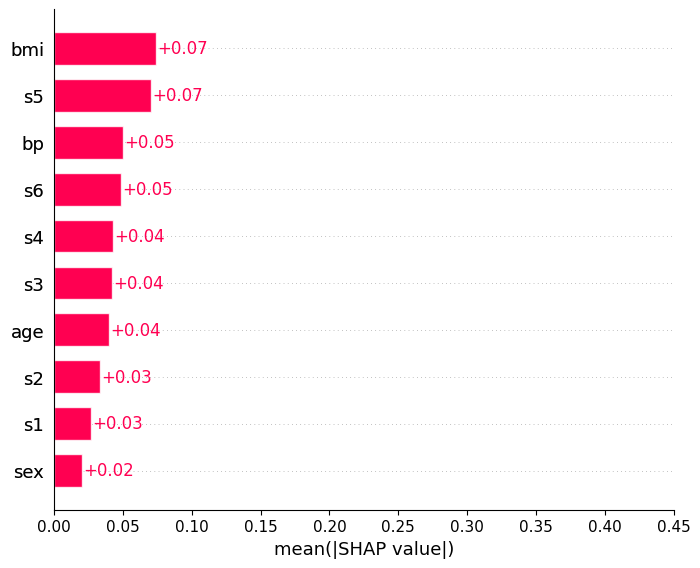

In [37]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.xlim(0.0, 0.45)  
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

<Figure size 6400x4800 with 0 Axes>

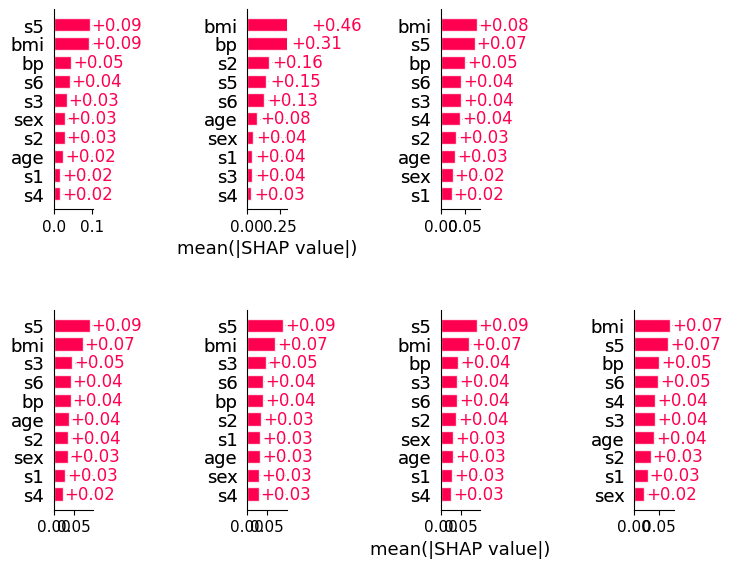

In [38]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[0,3])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_soft, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_gain, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

In [ ]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()